In [ ]:
!nvidia-smi

Fri Jul  1 08:27:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |    432MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
os.chdir('/content/drive/MyDrive/My Community session/Projects')
os.getcwd()

'/content/drive/MyDrive/My Community session/Projects'

In [ ]:
data_path = "/content/drive/MyDrive/My Community session/data/job_intents.json"

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import json
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Text Preprocessing

In [ ]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']

data_file = open(data_path, encoding='utf-8').read()
intents = json.loads(data_file)

In [ ]:
intents

{'intents': [{'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day',
    'Hey',
    'Ekse',
    'Hi'],
   'responses': ['Hi stranger',
    'Yebo yes, how can I help',
    'Ey watsupp',
    'Ekse Hoezit',
    'Hola',
    'Hey dude',
    'You again'],
   'tag': 'greeting'},
  {'patterns': ['Bye', 'See you later', 'Goodbye', 'Ok bye', 'Bye Bye'],
   'responses': ['See you!',
    'Have a nice day',
    'Sure Bye',
    'Later dude',
    'Sayoonara',
    'Peace out',
    'Sure dude',
    'Ciao'],
   'tag': 'goodbye'},
  {'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!',
    'Any time!',
    'My pleasure',
    'You are welcome',
    'Sure dude'],
   'tag': 'thanks'},
  {'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I understand',
    'I am still here dude'],
   'tag':

In [ ]:
for intent in intents['intents']:
  print(intent)

{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day', 'Hey', 'Ekse', 'Hi'], 'responses': ['Hi stranger', 'Yebo yes, how can I help', 'Ey watsupp', 'Ekse Hoezit', 'Hola', 'Hey dude', 'You again']}
{'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 'Goodbye', 'Ok bye', 'Bye Bye'], 'responses': ['See you!', 'Have a nice day', 'Sure Bye', 'Later dude', 'Sayoonara', 'Peace out', 'Sure dude', 'Ciao']}
{'tag': 'thanks', 'patterns': ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me'], 'responses': ['Happy to help!', 'Any time!', 'My pleasure', 'You are welcome', 'Sure dude']}
{'tag': 'noanswer', 'patterns': [], 'responses': ["Sorry, can't understand you", 'Please give me more info', 'Not sure I understand', 'I am still here dude']}
{'tag': 'name', 'patterns': ['What is your name', 'Whats your name', 'Tell me your name', 'Who are you', 'Ungubani', 'Tell me about yourself', 'You are'], 'responses

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
      print(pattern)

Hi there
How are you
Is anyone there?
Hey
Hola
Hello
Good day
Hey
Ekse
Hi
Bye
See you later
Goodbye
Ok bye
Bye Bye
Thanks
Thank you
That's helpful
Awesome, thanks
Thanks for helping me
What is your name
Whats your name
Tell me your name
Who are you
Ungubani
Tell me about yourself
You are
What do you do
How can you help
What do you know
What is your purpose
How can you help
South Africa
What can you tell me about SA
SA
Tell me about SA
What about SA
What do you know about SA
Tell me more about SA
What can you tell me about South Africa
Tell me about South Africa
What about South Africa
What do you know about South Africa
Tell me more about South Africa
South Africa Facts
SA Facts
Give me some facts about SA
Give me some facts about South Africa
SA Facts
SA interesting facts
South Africa facts
South Africa interesting facts
Tell me something interesting


In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)

        documents.append((w, intent['tag']))

In [ ]:
words

['Hi',
 'there',
 'How',
 'are',
 'you',
 'Is',
 'anyone',
 'there',
 '?',
 'Hey',
 'Hola',
 'Hello',
 'Good',
 'day',
 'Hey',
 'Ekse',
 'Hi',
 'Bye',
 'See',
 'you',
 'later',
 'Goodbye',
 'Ok',
 'bye',
 'Bye',
 'Bye',
 'Thanks',
 'Thank',
 'you',
 'That',
 "'s",
 'helpful',
 'Awesome',
 ',',
 'thanks',
 'Thanks',
 'for',
 'helping',
 'me',
 'What',
 'is',
 'your',
 'name',
 'Whats',
 'your',
 'name',
 'Tell',
 'me',
 'your',
 'name',
 'Who',
 'are',
 'you',
 'Ungubani',
 'Tell',
 'me',
 'about',
 'yourself',
 'You',
 'are',
 'What',
 'do',
 'you',
 'do',
 'How',
 'can',
 'you',
 'help',
 'What',
 'do',
 'you',
 'know',
 'What',
 'is',
 'your',
 'purpose',
 'How',
 'can',
 'you',
 'help',
 'South',
 'Africa',
 'What',
 'can',
 'you',
 'tell',
 'me',
 'about',
 'SA',
 'SA',
 'Tell',
 'me',
 'about',
 'SA',
 'What',
 'about',
 'SA',
 'What',
 'do',
 'you',
 'know',
 'about',
 'SA',
 'Tell',
 'me',
 'more',
 'about',
 'SA',
 'What',
 'can',
 'you',
 'tell',
 'me',
 'about',
 'South',
 'A

In [ ]:
documents

[(['Hi', 'there'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Hola'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Good', 'day'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Ekse'], 'greeting'),
 (['Hi'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Ok', 'bye'], 'goodbye'),
 (['Bye', 'Bye'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['Awesome', ',', 'thanks'], 'thanks'),
 (['Thanks', 'for', 'helping', 'me'], 'thanks'),
 (['What', 'is', 'your', 'name'], 'name'),
 (['Whats', 'your', 'name'], 'name'),
 (['Tell', 'me', 'your', 'name'], 'name'),
 (['Who', 'are', 'you'], 'name'),
 (['Ungubani'], 'name'),
 (['Tell', 'me', 'about', 'yourself'], 'name'),
 (['You', 'are'], 'name'),
 (['What', 'do', 'you', 'do'], 'options'),
 (['How', 'can', 'you', 'help'], 'options'),
 (['What', 'do', 'you', 

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)

        documents.append((w, intent['tag']))


        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
classes

['greeting',
 'goodbye',
 'thanks',
 'name',
 'options',
 'south_africa_info',
 'south_africa_facts']

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lm_words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]

In [ ]:
print(words, "\n" ,lm_words)

['Hi', 'there', 'How', 'are', 'you', 'Is', 'anyone', 'there', '?', 'Hey', 'Hola', 'Hello', 'Good', 'day', 'Hey', 'Ekse', 'Hi', 'Bye', 'See', 'you', 'later', 'Goodbye', 'Ok', 'bye', 'Bye', 'Bye', 'Thanks', 'Thank', 'you', 'That', "'s", 'helpful', 'Awesome', ',', 'thanks', 'Thanks', 'for', 'helping', 'me', 'What', 'is', 'your', 'name', 'Whats', 'your', 'name', 'Tell', 'me', 'your', 'name', 'Who', 'are', 'you', 'Ungubani', 'Tell', 'me', 'about', 'yourself', 'You', 'are', 'What', 'do', 'you', 'do', 'How', 'can', 'you', 'help', 'What', 'do', 'you', 'know', 'What', 'is', 'your', 'purpose', 'How', 'can', 'you', 'help', 'South', 'Africa', 'What', 'can', 'you', 'tell', 'me', 'about', 'SA', 'SA', 'Tell', 'me', 'about', 'SA', 'What', 'about', 'SA', 'What', 'do', 'you', 'know', 'about', 'SA', 'Tell', 'me', 'more', 'about', 'SA', 'What', 'can', 'you', 'tell', 'me', 'about', 'South', 'Africa', 'Tell', 'me', 'about', 'South', 'Africa', 'What', 'about', 'South', 'Africa', 'What', 'do', 'you', 'know', 

In [ ]:
lm_words = sorted(list(set(lm_words)))
lm_words

["'s",
 ',',
 'about',
 'africa',
 'anyone',
 'are',
 'awesome',
 'bye',
 'can',
 'day',
 'do',
 'ekse',
 'fact',
 'for',
 'give',
 'good',
 'goodbye',
 'hello',
 'help',
 'helpful',
 'helping',
 'hey',
 'hi',
 'hola',
 'how',
 'interesting',
 'is',
 'know',
 'later',
 'me',
 'more',
 'name',
 'ok',
 'purpose',
 'sa',
 'see',
 'some',
 'something',
 'south',
 'tell',
 'thank',
 'thanks',
 'that',
 'there',
 'ungubani',
 'what',
 'whats',
 'who',
 'you',
 'your',
 'yourself']

In [ ]:
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(lm_words), "unique lemmatized words", lm_words)

106 documents
7 classes ['goodbye', 'greeting', 'name', 'options', 'south_africa_facts', 'south_africa_info', 'thanks']
51 unique lemmatized words ["'s", ',', 'about', 'africa', 'anyone', 'are', 'awesome', 'bye', 'can', 'day', 'do', 'ekse', 'fact', 'for', 'give', 'good', 'goodbye', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'hola', 'how', 'interesting', 'is', 'know', 'later', 'me', 'more', 'name', 'ok', 'purpose', 'sa', 'see', 'some', 'something', 'south', 'tell', 'thank', 'thanks', 'that', 'there', 'ungubani', 'what', 'whats', 'who', 'you', 'your', 'yourself']


In [ ]:
pickle.dump(lm_words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

# Feature Engineering / Text representation

In [ ]:
# initializing training data
training = []
output_empty = [0] * len(classes)

In [ ]:
output_empty

[0, 0, 0, 0, 0, 0, 0]

In [ ]:
for doc in documents:
    bag = []
    pattern_words = doc[0]
    print(pattern_words)

['Hi', 'there']
['How', 'are', 'you']
['Is', 'anyone', 'there', '?']
['Hey']
['Hola']
['Hello']
['Good', 'day']
['Hey']
['Ekse']
['Hi']
['Bye']
['See', 'you', 'later']
['Goodbye']
['Ok', 'bye']
['Bye', 'Bye']
['Thanks']
['Thank', 'you']
['That', "'s", 'helpful']
['Awesome', ',', 'thanks']
['Thanks', 'for', 'helping', 'me']
['What', 'is', 'your', 'name']
['Whats', 'your', 'name']
['Tell', 'me', 'your', 'name']
['Who', 'are', 'you']
['Ungubani']
['Tell', 'me', 'about', 'yourself']
['You', 'are']
['What', 'do', 'you', 'do']
['How', 'can', 'you', 'help']
['What', 'do', 'you', 'know']
['What', 'is', 'your', 'purpose']
['How', 'can', 'you', 'help']
['South', 'Africa']
['What', 'can', 'you', 'tell', 'me', 'about', 'SA']
['SA']
['Tell', 'me', 'about', 'SA']
['What', 'about', 'SA']
['What', 'do', 'you', 'know', 'about', 'SA']
['Tell', 'me', 'more', 'about', 'SA']
['What', 'can', 'you', 'tell', 'me', 'about', 'South', 'Africa']
['Tell', 'me', 'about', 'South', 'Africa']
['What', 'about', 'South'

In [ ]:
for doc in documents:

    bag = []

    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in lm_words:
        bag.append(1) if w in pattern_words else bag.append(0)


    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [ ]:
random.shuffle(training)
training = np.array(training)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
training.shape

(106, 2)

In [ ]:
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])

VALIDATION_SET = (train_x, train_y)

# Modeling & Evaluation

In [ ]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [ ]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
#fitting and saving the model
history = model.fit(np.array(train_x), np.array(train_y), epochs=250, validation_data = VALIDATION_SET, batch_size=5, verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 16ms/step - loss: 1.9315 - accuracy: 0.2075 - val_loss: 1.7400 - val_accuracy: 0.3585
Epoch 2/250
22/22 [==============================] - 0s 7ms/step - loss: 1.6782 - accuracy: 0.3491 - val_loss: 1.4817 - val_accuracy: 0.5094
Epoch 3/250
22/22 [==============================] - 0s 14ms/step - loss: 1.4884 - accuracy: 0.5094 - val_loss: 1.2121 - val_accuracy: 0.6415
Epoch 4/250
22/22 [==============================] - 0s 8ms/step - loss: 1.2844 - accuracy: 0.5472 - val_loss: 0.9972 - val_accuracy: 0.7736
Epoch 5/250
22/22 [==============================] - 0s 7ms/step - loss: 1.0737 - accuracy: 0.6698 - val_loss: 0.8195 - val_accuracy: 0.8302
Epoch 6/250
22/22 [==============================] - 0s 6ms/step - loss: 0.9746 - accuracy: 0.7075 - val_loss: 0.6489 - val_accuracy: 0.8491
Epoch 7/250
22/22 [==============================] - 0s 6ms/step - loss: 0.8398 - accuracy: 0.7358 - val_loss: 0.5088 - val_accuracy: 0.9057
Epoch 8/250

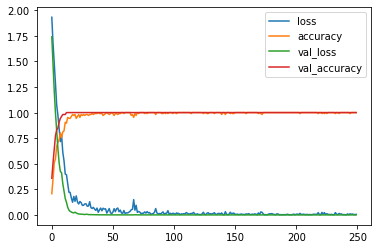

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.save('chatbot_model.h5', history)
print("model created")

model created
